# EDA (Exploratory Data Analysis)

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# loading data
df = pd.read_csv('P1.csv')
pd.DataFrame(df)

,Indikator,Tipe
0,mengajak orang tersebut berbicara hal-hal yang...,S
1,Saya mengiyakan terlebih dahulu namun setelah ...,S
2,cara yang biasanya sering saya lakukan yaitu m...,S
3,menjadi pendengar yang baik,S
4,Saya hanya mendengarkan dan memperhatikan gera...,S
...,...,...
97,dengan cara memahami dan mendengarkan orang be...,S
98,Dengan mencari info akurat apakah info itu ben...,N
99,biasanya saya langsung diberitahu atau saya ya...,S
100,"mendekatkan diri seolah-olah kita akrab, dan m...",S


In [ ]:
#  memeriksa missing value
df.isnull().sum()

Indikator    0
Tipe         0
dtype: int64

In [ ]:
df.describe(include=['object'])

,Indikator,Tipe
count,102,102
unique,102,2
top,mengajak orang tersebut berbicara hal-hal yang...,S
freq,1,76


In [ ]:
total = df.groupby(['Tipe']).count()
total

,Indikator
Tipe,
N,26
S,76


In [ ]:
#Mencari kata terumum pada kolom indikator
from collections import Counter

words = list(df["Indikator"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(100)

[('saya', 64),
 ('informasi', 52),
 ('dan', 36),
 ('yang', 34),
 ('tersebut', 33),
 ('dengan', 31),
 ('akan', 27),
 ('orang', 19),
 ('tidak', 19),
 ('mendengarkan', 18),
 ('itu', 16),
 ('atau', 16),
 ('Saya', 14),
 ('jika', 13),
 ('langsung', 12),
 ('mereka', 10),
 ('untuk', 10),
 ('mencari', 10),
 ('dari', 10),
 ('benar', 10),
 ('lebih', 9),
 ('Dengan', 9),
 ('apakah', 9),
 ('baik', 8),
 ('dia', 8),
 ('secara', 8),
 ('percaya', 8),
 ('sendiri', 8),
 ('cara', 7),
 ('menanyakan', 7),
 ('berbicara', 6),
 ('mungkin', 6),
 ('biasanya', 6),
 ('apa', 6),
 ('melihat', 5),
 ('memahami', 5),
 ('baru', 5),
 ('dapat', 4),
 ('hal', 4),
 ('tersebut.', 4),
 ('mempercayai', 4),
 ('dekat', 4),
 ('mencoba', 4),
 ('karena', 4),
 ('kita', 4),
 ('saja', 4),
 ('seseorang', 4),
 ('memastikan', 4),
 ('tau', 4),
 ('tergantung', 4),
 ('bercerita', 4),
 ('kepada', 4),
 ('saya,', 4),
 ('penting', 4),
 ('terkadang', 4),
 ('nya', 4),
 ('diri', 4),
 ('terlebih', 3),
 ('dahulu', 3),
 ('mendapatkan', 3),
 ('menjadi',

#Data Pre-processing

1. Case Folding
2. Data Cleansing
- Case folding
- Stripping
- Remove emoji
- Remove number
- Remove character
- Remove punctiation
- Remove single char
3. Tokenizing
4. Normalization
5. Filtering
6. Stemming

In [ ]:
# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
df['Indikator'] = df['Indikator'].str.lower()
pd.DataFrame(df['Indikator'])

,Indikator
0,mengajak orang tersebut berbicara hal-hal yang...
1,saya mengiyakan terlebih dahulu namun setelah ...
2,cara yang biasanya sering saya lakukan yaitu m...
3,menjadi pendengar yang baik
4,saya hanya mendengarkan dan memperhatikan gera...
...,...
97,dengan cara memahami dan mendengarkan orang be...
98,dengan mencari info akurat apakah info itu ben...
99,biasanya saya langsung diberitahu atau saya ya...
100,"mendekatkan diri seolah-olah kita akrab, dan m..."


In [ ]:
# data cleansing
from IPython.utils import text
import string
import re #regex library

# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def data_clean(indikator) :
  #remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  #remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  #remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  #remove number
  indikator = re.sub(r"\d+", "", indikator)
  #remove punctuation
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  #remove whitespace leading & trailing
  indikator =  indikator.strip()
  #remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  #remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator
df['Indikator_clean'] = df['Indikator'].apply(data_clean)
  #NLTK word tokenize
def word_tokenize_wrapper(indikator) :
  return word_tokenize(indikator)

df['Indikator_tokens'] = df['Indikator_clean'].apply(word_tokenize_wrapper)

pd.DataFrame(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Indikator,Tipe,Indikator_clean,Indikator_tokens
0,mengajak orang tersebut berbicara hal-hal yang...,S,mengajak orang tersebut berbicara halhal yang ...,"[mengajak, orang, tersebut, berbicara, halhal,..."
1,saya mengiyakan terlebih dahulu namun setelah ...,S,saya mengiyakan terlebih dahulu namun setelah ...,"[saya, mengiyakan, terlebih, dahulu, namun, se..."
2,cara yang biasanya sering saya lakukan yaitu m...,S,cara yang biasanya sering saya lakukan yaitu m...,"[cara, yang, biasanya, sering, saya, lakukan, ..."
3,menjadi pendengar yang baik,S,menjadi pendengar yang baik,"[menjadi, pendengar, yang, baik]"
4,saya hanya mendengarkan dan memperhatikan gera...,S,saya hanya mendengarkan dan memperhatikan gera...,"[saya, hanya, mendengarkan, dan, memperhatikan..."
...,...,...,...,...
97,dengan cara memahami dan mendengarkan orang be...,S,dengan cara memahami dan mendengarkan orang be...,"[dengan, cara, memahami, dan, mendengarkan, or..."
98,dengan mencari info akurat apakah info itu ben...,N,dengan mencari info akurat apakah info itu ben...,"[dengan, mencari, info, akurat, apakah, info, ..."
99,biasanya saya langsung diberitahu atau saya ya...,S,biasanya saya langsung diberitahu atau saya ya...,"[biasanya, saya, langsung, diberitahu, atau, s..."
100,"mendekatkan diri seolah-olah kita akrab, dan m...",S,mendekatkan diri seolaholah kita akrab dan men...,"[mendekatkan, diri, seolaholah, kita, akrab, d..."


In [ ]:
normalizad_word = pd.read_csv("normalisasi1.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Indikator_normalized'] = df['Indikator_tokens'].apply(normalized_term)

df['Indikator_normalized'].head()

0    [mengajak, orang, tersebut, berbicara, halhal,...
1    [saya, mengiyakan, terlebih, dahulu, namun, se...
2    [cara, yang, biasanya, sering, saya, lakukan, ...
3                     [menjadi, pendengar, yang, baik]
4    [saya, hanya, mendengarkan, dan, memperhatikan...
Name: Indikator_normalized, dtype: object

In [ ]:
# # filtering
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')


# def stopword_removal (indikator):
#   filtering = stopwords.words('indonesian','english')
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
# df['indikator_filter'].head()

In [ ]:
# Membuat list stopword sesuai kebutuhan fitur berdasarkan most uninformative words
'''
Ketika ada PR yang harus diselesaikan malam ini, Tiba-tiba teman lamamu mengajak
kamu untuk bertemu (reuni,bermain, ngobrol). Bagaimana cara kamu menyikapinya? , ceritakan alasannya!
'''
stop_list = ["saya","akan","dan","dengan","yang","di","lalu","jika","secara"]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
df['indikator_filter']

0      [mengajak, orang, tersebut, berbicara, halhal,...
1      [mengiyakan, terlebih, dahulu, namun, setelah,...
2      [cara, biasanya, sering, lakukan, yaitu, melih...
3                             [menjadi, pendengar, baik]
4      [hanya, mendengarkan, memperhatikan, gerak, ge...
                             ...                        
97      [cara, memahami, mendengarkan, orang, berbicara]
98     [mencari, info, akurat, apakah, info, itu, ben...
99     [biasanya, langsung, diberitahu, atau, menanya...
100    [mendekatkan, diri, seolaholah, kita, akrab, m...
101    [melihat, dia, berbicara, seperti, apa, kelaku...
Name: indikator_filter, Length: 102, dtype: object

In [ ]:
# Stemming

!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

df['indikator_stemming'] = df['indikator_filter'].apply(stemming)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00
ajak orang sebut bicara halhal mungkin ingin mereka sampai
iya lebih dahulu namun telah itu research kait kebenerannya
cara biasa sering laku yaitu lihat bahasa tubuh mereka mungkin mereka lihat marah murung dll kemudian pasti tanya ada mereka untuk dapat jawab lebih validtepat
jadi dengar baik
hanya dengar perhati gerak gerik bahasa tubuh orang sebut
usaha paham daru bagai perspektif
tetap amat tetap cari benar dari mana informasi dia dapat sebut
obrol jadi tahu banyak hal dapat informasi dari orang sebut tentu percaya tema dekat beda hanya dar teman cari benar
biasa komunikasi lalu media sosial
proses supaya tidak salah tangkap
tanya lebih lanjut
coba kosong pikir agar bisa paham serius teliti
dengar baik fokus
tentu cari tahu apakah informasi baru sebut benar karena kita asal percaya bisa saja itu jadi buah fitnah rugi orang lain
tanya informasi sebut dalam pikir sendiri apakah informasi itu valid atau

In [ ]:
#tokenize data stemming

 #NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

df['indikator_stemmed_tokens'] = df['indikator_stemming'].apply(stemmed_tokenizing)


In [ ]:
pd.DataFrame(df[['Indikator_normalized', 'indikator_filter', 'indikator_stemmed_tokens']])

,Indikator_normalized,indikator_filter,indikator_stemmed_tokens
0,"[mengajak, orang, tersebut, berbicara, halhal,...","[mengajak, orang, tersebut, berbicara, halhal,...","[ajak, orang, sebut, bicara, halhal, mungkin, ..."
1,"[saya, mengiyakan, terlebih, dahulu, namun, se...","[mengiyakan, terlebih, dahulu, namun, setelah,...","[iya, lebih, dahulu, namun, telah, itu, resear..."
2,"[cara, yang, biasanya, sering, saya, lakukan, ...","[cara, biasanya, sering, lakukan, yaitu, melih...","[cara, biasa, sering, laku, yaitu, lihat, baha..."
3,"[menjadi, pendengar, yang, baik]","[menjadi, pendengar, baik]","[jadi, dengar, baik]"
4,"[saya, hanya, mendengarkan, dan, memperhatikan...","[hanya, mendengarkan, memperhatikan, gerak, ge...","[hanya, dengar, perhati, gerak, gerik, bahasa,..."
...,...,...,...
97,"[dengan, cara, memahami, dan, mendengarkan, or...","[cara, memahami, mendengarkan, orang, berbicara]","[cara, paham, dengar, orang, bicara]"
98,"[dengan, mencari, info, akurat, apakah, info, ...","[mencari, info, akurat, apakah, info, itu, ben...","[cari, info, akurat, apakah, info, itu, benart..."
99,"[biasanya, saya, langsung, diberitahu, atau, s...","[biasanya, langsung, diberitahu, atau, menanya...","[biasa, langsung, diberitahu, atau, tanya, kep..."
100,"[mendekatkan, diri, seolaholah, kita, akrab, d...","[mendekatkan, diri, seolaholah, kita, akrab, m...","[dekat, diri, seolaholah, kita, akrab, cari, i..."


In [ ]:
df.head()

,Indikator,Tipe,Indikator_clean,Indikator_tokens,Indikator_normalized,indikator_filter,indikator_stemming,indikator_stemmed_tokens
0,mengajak orang tersebut berbicara hal-hal yang...,S,mengajak orang tersebut berbicara halhal yang ...,"[mengajak, orang, tersebut, berbicara, halhal,...","[mengajak, orang, tersebut, berbicara, halhal,...","[mengajak, orang, tersebut, berbicara, halhal,...",ajak orang sebut bicara halhal mungkin ingin m...,"[ajak, orang, sebut, bicara, halhal, mungkin, ..."
1,saya mengiyakan terlebih dahulu namun setelah ...,S,saya mengiyakan terlebih dahulu namun setelah ...,"[saya, mengiyakan, terlebih, dahulu, namun, se...","[saya, mengiyakan, terlebih, dahulu, namun, se...","[mengiyakan, terlebih, dahulu, namun, setelah,...",iya lebih dahulu namun telah itu research kait...,"[iya, lebih, dahulu, namun, telah, itu, resear..."
2,cara yang biasanya sering saya lakukan yaitu m...,S,cara yang biasanya sering saya lakukan yaitu m...,"[cara, yang, biasanya, sering, saya, lakukan, ...","[cara, yang, biasanya, sering, saya, lakukan, ...","[cara, biasanya, sering, lakukan, yaitu, melih...",cara biasa sering laku yaitu lihat bahasa tubu...,"[cara, biasa, sering, laku, yaitu, lihat, baha..."
3,menjadi pendengar yang baik,S,menjadi pendengar yang baik,"[menjadi, pendengar, yang, baik]","[menjadi, pendengar, yang, baik]","[menjadi, pendengar, baik]",jadi dengar baik,"[jadi, dengar, baik]"
4,saya hanya mendengarkan dan memperhatikan gera...,S,saya hanya mendengarkan dan memperhatikan gera...,"[saya, hanya, mendengarkan, dan, memperhatikan...","[saya, hanya, mendengarkan, dan, memperhatikan...","[hanya, mendengarkan, memperhatikan, gerak, ge...",hanya dengar perhati gerak gerik bahasa tubuh ...,"[hanya, dengar, perhati, gerak, gerik, bahasa,..."


# Feature extraction

In [ ]:
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
data_clean = df.astype({'Tipe' : 'category'})
data_clean = df.astype({'indikator_stemmed_tokens' : 'string'})
data_clean.dtypes

Indikator                           object
Tipe                                object
Indikator_clean                     object
Indikator_tokens                    object
Indikator_normalized                object
indikator_filter                    object
indikator_stemming                  object
indikator_stemmed_tokens    string[python]
dtype: object

In [ ]:
#  memeriksa missing value
df.isnull().any()

Indikator                   False
Tipe                        False
Indikator_clean             False
Indikator_tokens            False
Indikator_normalized        False
indikator_filter            False
indikator_stemming          False
indikator_stemmed_tokens    False
dtype: bool

In [ ]:
# Missing value handling

for idx in data_clean.index:
 if(len(data_clean["indikator_stemming"][idx]) == 0):
  data_clean = data_clean.drop(index=idx)

In [ ]:
# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembobotan TF-IDF pada kolom "indikator"
X = tfidf_vectorizer.fit_transform(data_clean['indikator_stemmed_tokens'])


In [ ]:
len(data_clean)

102

In [ ]:
# encoding label
enc = LabelEncoder()
data_clean['type of encoding'] = enc.fit_transform(data_clean['Tipe'])

y = data_clean['type of encoding']

# Splitting Data

In [ ]:
# Splitting data package
from sklearn.model_selection import train_test_split

In [ ]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [ ]:
pd.DataFrame(X,y)

,0
type of encoding,
1,"(0, 226)\t0.3720538746256132\n (0, 171)\t0...."
1,"(0, 126)\t0.38452367680117416\n (0, 120)\t0..."
1,"(0, 292)\t0.2165698862750378\n (0, 117)\t0...."
1,"(0, 24)\t0.6425350026746844\n (0, 72)\t0.41..."
1,"(0, 90)\t0.41105409600443366\n (0, 89)\t0.4..."
...,...
1,"(0, 195)\t0.5127282871036073\n (0, 72)\t0.3..."
0,"(0, 133)\t0.3311383457609677\n (0, 35)\t0.3..."
1,"(0, 75)\t0.5315360173977088\n (0, 132)\t0.4..."


In [ ]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12, shuffle=True)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(76, 296) (76,) (26, 296) (26,)


# Train Model & Selecting Model

In [ ]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

f1_scores = {

}

#Random Forest
random_forest = RandomForestClassifier()#n_estimators=100, random_state = 7)
# fit the model
random_forest.fit(X_train, y_train)
# train score
train_score = random_forest.score(X_train, y_train)
# test score
test_score = random_forest.score(X_test,y_test)
# predict
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(random_forest, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Random Forest'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

# print("Accuracy: %.2f%%" % (predict_score * 100.0))

In [ ]:
random_forest.score(X_train,y_train),random_forest.score(X_test, y_test)

(1.0, 0.7307692307692307)

In [ ]:
#XG boost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test,y_test)
Y_pred = xgb.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(xgb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['XG Boost'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.9605263157894737, 0.5769230769230769)

In [ ]:
#Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

train_score = sgd.score(X_train, y_train)
test_score = sgd.score(X_test,y_test)
Y_pred = sgd.predict(X_test)
predictions = [round(value) for value in Y_pred]

#Metric evaluation
#cv scores
cv_scores = cross_val_score(sgd, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SGD'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

In [ ]:
sgd.score(X_train,y_train),sgd.score(X_test, y_test)

(1.0, 0.7692307692307693)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test,y_test)
Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(logreg, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Logreg'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
logreg.score(X_train,y_train),logreg.score(X_test, y_test)

(0.8026315789473685, 0.7307692307692307)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test,y_test)
Y_Pred = knn.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(knn, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['KNN'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
knn.score(X_train,y_train),knn.score(X_test, y_test)

(0.7763157894736842, 0.6153846153846154)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test,y_test)
Y_pred = svm.predict(X_test)

# Metric evaluation
#cv scores
cv_scores = cross_val_score(svm, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SVM'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
svm.score(X_train,y_train),svm.score(X_test, y_test)

(1.0, 0.7307692307692307)

In [ ]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB().fit(X_train, y_train)

# evaluate score
train_score = mnb.score(X_train, y_train)

test_score = mnb.score(X_test,y_test)

Y_pred = svm.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(mnb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['MNB'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
mnb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.8289473684210527, 0.5769230769230769)

In [ ]:
pd.DataFrame.from_dict(f1_scores, orient='index', columns=['CV f1-Scores']).sort_values(by='CV f1-Scores',ascending=False)

,CV f1-Scores
KNN,70.22
SGD,64.20
XG Boost,57.12
Random Forest,56.15
SVM,49.89
Logreg,46.07
MNB,46.07


In [ ]:
y_test.value_counts()

type of encoding
1    19
0     7
Name: count, dtype: int64

In [ ]:
pd.DataFrame(data_clean[['Tipe','type of encoding']])

,Tipe,type of encoding
0,S,1
1,S,1
2,S,1
3,S,1
4,S,1
...,...,...
97,S,1
98,N,0
99,S,1
100,S,1


# Model Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV

# XGB Hyperparam tuning

In [ ]:
# cv=[(slice(None), slice(None))]
# define params for tuning Naive Bayes
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1)
knn_improve_gridSearch.fit(X, y)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 77.61538461538461


In [ ]:
knn = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=3, p=2, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_knn) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_knn) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_knn) * 100)

Training set accuracy:  89.17910447761194
Test set accuracy:  80.0
Test set f1-score:  84.74576271186439
Test set precision:  80.64516129032258
Test set recall:  89.28571428571429


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        34
           1       0.81      0.89      0.85        56

    accuracy                           0.80        90
   macro avg       0.80      0.77      0.78        90
weighted avg       0.80      0.80      0.80        90



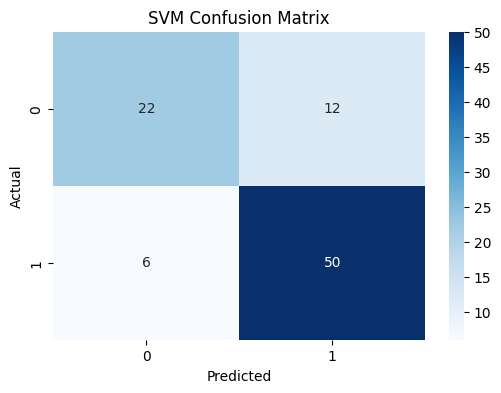

True Positives: 50
True Negatives: 22
False Positives: 6
False Negatives: 12


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_knn)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# XGB SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# cv=[(slice(None), slice(None))]
# define params for tuning Naive Bayes
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

sgd_improve = KNeighborsClassifier()
sgd_improve_gridSearch = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1)
sgd_improve_gridSearch.fit(X_sm, y_sm)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_gridSearch.best_params_)
print("Skor terbaik:", sgd_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Skor terbaik: 69.07894736842105


# XGB ADS

In [ ]:
from imblearn.over_sampling import ADASYN

ads = ADASYN()

X_ads, y_ads = ads.fit_resample(X, y)

In [ ]:
# cv=[(slice(None), slice(None))]
# define params for tuning Naive Bayes
pparameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

sgd_improve = KNeighborsClassifier()
sgd_improve_gridSearch = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1)
sgd_improve_gridSearch.fit(X_ads, y_ads)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_gridSearch.best_params_)
print("Skor terbaik:", sgd_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Skor terbaik: 65.45209176788124


# XGB TL

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_tl, y_tl = tl.fit_resample(X, y)

In [ ]:
# cv=[(slice(None), slice(None))]
# define params for tuning Naive Bayes
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

sgd_improve = KNeighborsClassifier()
sgd_improve_gridSearch = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1)
sgd_improve_gridSearch.fit(X_tl, y_tl)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_gridSearch.best_params_)
print("Skor terbaik:", sgd_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 77.26923076923076


# XGB RUS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
# cv=[(slice(None), slice(None))]
# define params for tuning Naive Bayes
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

sgd_improve = KNeighborsClassifier()
sgd_improve_gridSearch = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1)
sgd_improve_gridSearch.fit(X_rus, y_rus)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_gridSearch.best_params_)
print("Skor terbaik:", sgd_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 65.38461538461539


# Predict Testing

In [ ]:
list_indikator = np.array(data_clean['indikator_stemmed_tokens'])
list_tipe = np.array(data_clean['type of encoding'])

In [ ]:
cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(list_indikator)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

In [ ]:
# Posts in tf-idf representation
X = X_tfidf

In [ ]:
X.shape

(126, 185)

In [ ]:
'''
Dataset baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
result = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = LogisticRegression(C = 0.001, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
# model.fit(X_train,y_train)
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])


In [ ]:
if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)



menolak nya, karena harus segera dikumpulkan 
The result is :  J


In [ ]:
y_test.value_counts()


In [ ]:
data_clean['Tipe'].value_counts()

# Saving prepro

In [ ]:
# diimport dulu terrr semua depedencies nya terr
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
# prepro depedencies
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# data cleansing
from IPython.utils import text
import string
import re #regex library
# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# model algorithm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# # load data
# data = pd.read_csv('P1.csv')

# # preprocessing the data -> cleanse the data & convert feature dtype as a vector/numbers yagesya biar bisa dipahami sama mesinnya brok.
# data['Indikator'] = data['Indikator'].str.lower()
# pd.DataFrame(data['Indikator'])

# def data_clean(indikator) :
#   #remove tab. new line, and back slice
#   indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
#   #remove non ASCII (emoticon,dll)
#   indikator = indikator.encode('ascii', 'replace').decode('ascii')
#   #remove mention, link, hashtag
#   indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
#   #remove number
#   indikator = re.sub(r"\d+", "", indikator)
#   #remove punctuation
#   indikator = indikator.translate(str.maketrans("","",string.punctuation))
#   #remove whitespace leading & trailing
#   indikator =  indikator.strip()
#   #remove multiple white spacew into single white space
#   indikator = re.sub('\s+', ' ', indikator)
#   #remove single char
#   indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

#   return indikator
# data['Indikator_clean'] = data['Indikator'].apply(data_clean)
#   #NLTK word tokenize
# def word_tokenize_wrapper(indikator) :
#   return word_tokenize(indikator)

# data['Indikator_tokens'] = data['Indikator_clean'].apply(word_tokenize_wrapper)

# normalizad_word = pd.read_csv("normalisasi1.csv")

# normalizad_word_dict = {}

# for index, row in normalizad_word.iterrows():
#     if row[0] not in normalizad_word_dict:
#         normalizad_word_dict[row[0]] = row[1]

# def normalized_term(document):
#     return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# data['Indikator_normalized'] = data['Indikator_tokens'].apply(normalized_term)

# stop_list = ["saya","akan","dan","dengan","yang","di","lalu","jika","secara"]

# def stopword_removal (indikator):
#   filtering = stop_list
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# data['indikator_filter'] = data['Indikator_normalized'].apply(stopword_removal)

# # Stemming
# def stemming(indikator) :
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()

#   do = []
#   for w in indikator :
#     dt = stemmer.stem(w)
#     do.append(dt)

#   data_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# data['indikator_stemming'] = data['indikator_filter'].apply(stemming)

# #tokenize data stemming - NLTK word tokenize
# def stemmed_tokenizing(indikator) :
#   return word_tokenize(indikator)

# data['indikator_stemmed_tokens'] = data['indikator_stemming'].apply(stemmed_tokenizing)

# data_clean = data.astype({'Tipe' : 'category'})
# data_clean = data.astype({'indikator_stemmed_tokens' : 'string'})

# X = data_clean['indikator_stemmed_tokens']
# y = data_clean['Tipe']

# list_indikator = np.array(X)
# list_tipe = np.array(y)
# enc = LabelEncoder()
# list_tipe = enc.fit_transform(list_tipe)

# # Saving X
# !pip install joblib
# import joblib
# joblib.dump(list_indikator, 'X_P1.sav')

# # Saving y encode
# joblib.dump(list_tipe, 'y_P1.sav')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Saving prepro for testing

In [ ]:
# Load data
dt = pd.read_csv('test_P1.csv')

# casefolding
dt['Indikator'] = dt['Indikator'].str.lower()

# cleansing
def data_clean(indikator) :
  # remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  # remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  # remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  # remove number
  indikator = re.sub(r"\d+", "", indikator)
  # remove punct
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  # remove whitespace leading & trailing
  indikator = indikator.strip()
  # remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  # remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator

dt['Indikator'] = dt['Indikator'].apply(data_clean)

# Tokenizing
def word_tokenize_wrapper(indikator) :

  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(word_tokenize_wrapper)

# Normalization

normalized_list = pd.read_csv('normalisasi1.csv')
normalized_dict = {}

for index, row in normalized_list.iterrows() :
  if row[0] not in normalized_dict :
    normalized_dict[row[0]] = row[1]

def normalizer(indikator) :
  return [normalized_dict[term] if term in normalized_dict else term for term in indikator]

dt['Indikator'] = dt['Indikator'].apply(normalizer)

# filtering
stop_list = ["saya","akan","dan","dengan","yang","di","lalu","jika","secara"]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

dt['Indikator'] = dt['Indikator'].apply(stopword_removal)

# Stemming
def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

dt['Indikator'] = dt['Indikator'].apply(stemming)

#tokenize data stemming - NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(stemmed_tokenizing)



tidak langsung percaya cari tahu lebih rinci
tidak langsung percaya informasi sampai tahu hal sampai oleh memang nyata benar lihat sendiri informasi sebut
fokus dengar cerna informasi sebut aju tanya lebih rinci kena informasi sebut banding apa dapat dari orang lain atau media sosial pasti catat poin poin penting
cenderung dengar seksama paham informasi sebut aju beberapa tanya mungkin coba hubung tahu
coba dengar tanya dari mana sumber informasi sebut
dengar informasi sebut baik kalaupun gagal paham tanya
biasa laku cerita atau bagi buah alam seperti teman bagi cerita tentang bagaimana dia laku hal hal anggap manfaat untuk laku
meski dari orang dekat sekalipun tidak langsung tel informasi baru sebut mentah sehingga biasa tanya kembali sumber informasi dapat
tangkap informasi baru lalu handphone


In [ ]:
dt.to_csv('P1_prepro.csv',index=False)

# eval

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import joblib
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

# Load data X and y
X = joblib.load('X_P1.sav')
y = joblib.load('y_P1.sav')

# Initialize and fit CountVectorizer and TfidfTransformer
cntizer = CountVectorizer(analyzer="word", max_features=1000, min_df=0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf = tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

# Load new data for prediction
dt = pd.read_csv('P1_prepro.csv')
df_test = dt['Indikator']
label = dt['Tipe']

# Transform the new data
my_X_cnt = cntizer.transform(df_test.values.astype('U'))
my_X_tfidf = tfizer.transform(my_X_cnt).toarray()

# Initialize the result list
result = []

# Train the model
X_tl, y_tl = tl.fit_resample(X, y)
model = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=5, p=2, weights='uniform')
model.fit(X_tl, y_tl)
# Save the model
joblib.dump(model, 'clf_P1.sav')

# Predict the new data
y_pred = model.predict(my_X_tfidf)

# Convert predictions
for pred in y_pred:
    if pred == 0:
        result.append('N')
    else:
        result.append('S')

# Display the predictions
for i, res in enumerate(result):
    print(f"{res}")


N
S
S
S
S
S
S
S
S


In [ ]:
pd.DataFrame(label)

,Tipe
0,N
1,S
2,N
3,S
4,S
5,S
6,S
7,N
8,S


In [ ]:
pd.DataFrame(df_test)

,Indikator
0,"['tidak', 'langsung', 'percaya', 'cari', 'tahu..."
1,"['tidak', 'langsung', 'percaya', 'informasi', ..."
2,"['fokus', 'dengar', 'cerna', 'informasi', 'seb..."
3,"['cenderung', 'dengar', 'seksama', 'paham', 'i..."
4,"['coba', 'dengar', 'tanya', 'dari', 'mana', 's..."
5,"['dengar', 'informasi', 'sebut', 'baik', 'kala..."
6,"['biasa', 'laku', 'cerita', 'atau', 'bagi', 'b..."
7,"['meski', 'dari', 'orang', 'dekat', 'sekalipun..."
8,"['tangkap', 'informasi', 'baru', 'lalu', 'hand..."


# Saving model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

X = joblib.load('X_T3.sav')
y = joblib.load('y_T3.sav')

cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

'''
Dataset Baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

result = []

sm = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = LogisticRegression(C = 0.001, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
model.fit(X_train_sm, y_train_sm)

joblib.dump(model,'clf_T3.sav')

y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])

if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)




menolak nya, karena harus segera dikumpulkan 
The result is :  J


# Load Model

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

X = joblib.load('X_T3.sav')
y = joblib.load('y_T3.sav')

cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

'''
dataset Baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
# user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J
# user_input = "Saya akan mengatakan bahwasannya ingin menyelesaikan PR saya terlebih dahulu, dan akan menyusul apabila sudah selesai mengerjakannya." #J
# user_input = "Saya akan menyelesaikan terlebih dahulu tugas saya lalu menerima ajakan teman saya.. walau pertemuannya diundur beberapa jam." #J
# user_input = "Jika saya terganggu, saya akan minta maaf dan meminta waktu kepada dia agar saya bisa menyelesaikan tugas saya" #J
# user_input = "Saya akan menolaknya,karena ada tugas yang harus saya selesaikan hari itu juga" #J
# user_input = "Saya akan menolaknya dengan halus ataupun jika dia memaksa kemungkinan saya akan membawa PR saya di tempat tersebut lalu saya akan mengerjakan pr saya disana sembari mengobrol agar tidak terlalu suntuk mengerjakannya sendiri" #P

#P = 7 || N = 3

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

result = []
model = joblib.load('clf_T3.sav')
y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])

if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)

Saya akan menolaknya dengan halus ataupun jika dia memaksa kemungkinan saya akan membawa PR saya di tempat tersebut lalu saya akan mengerjakan pr saya disana sembari mengobrol agar tidak terlalu suntuk mengerjakannya sendiri
The result is :  J
